(<Axes: >, <matplotlib.image.AxesImage at 0x16c2aa050>)

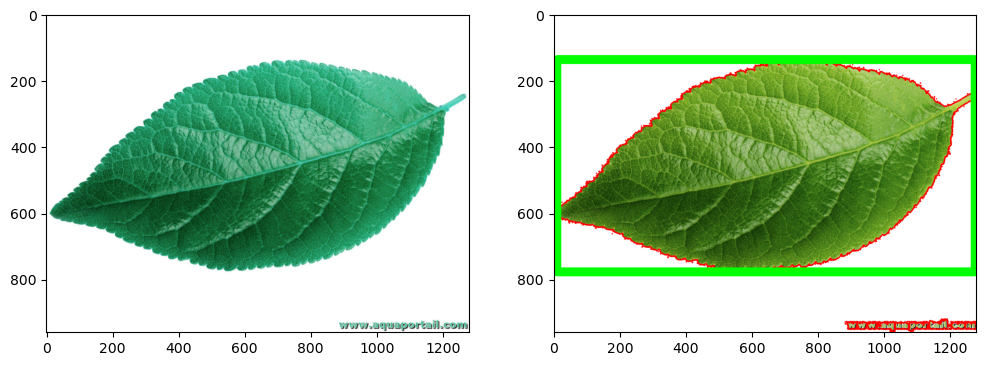

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

img = cv2.imread('/Users/titouanlegourrierec/Downloads/feuille.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = cv2.imread('/Users/titouanlegourrierec/Downloads/feuille.jpg')

lower = np.array([3, 3, 3])  # Lower bounds for BGR channels
higher = np.array([250, 250, 250])

mask = cv2.inRange(img,lower,higher)

cont,_ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cont_image = cv2.drawContours(img, cont, -1, 255, 3)

c = max(cont, key=cv2.contourArea)

x,y,w,h = cv2.boundingRect(c)

cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 25)
plt.figure(figsize=(12,12))
plt.subplot(1,2,1), plt.imshow(img1)
plt.subplot(1,2,2), plt.imshow(cont_image)


In [2]:
from rembg import remove
from PIL import Image

input = Image.open('/Users/titouanlegourrierec/Desktop/2.jpg')
output = remove(input)

/Users/titouanlegourrierec/anaconda3/lib/python3.11/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (174967808 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
2024-03-13 10:32:02.746579 [W:onnxruntime:, coreml_execution_provider.cc:81 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 67 number of nodes in the graph: 371 number of nodes supported by CoreML: 300


(<Axes: >, <matplotlib.image.AxesImage at 0x307a2ba50>)

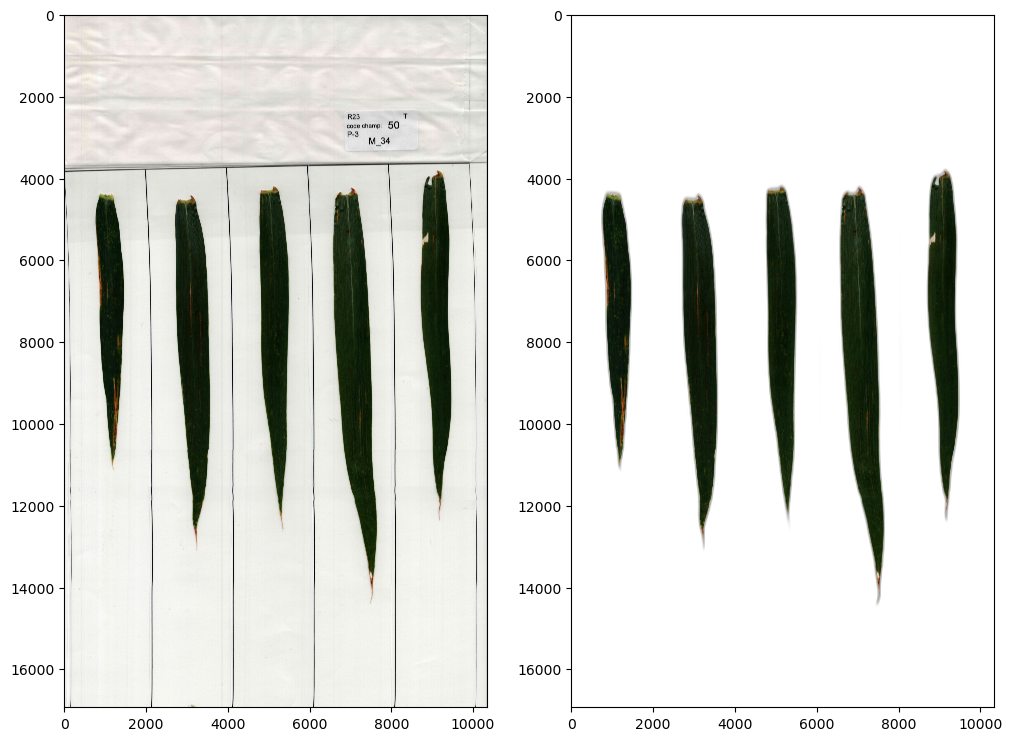

In [3]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1), plt.imshow(input)
plt.subplot(1,2,2), plt.imshow(output)

In [36]:
from rembg import remove
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

input = Image.open('/Users/titouanlegourrierec/Desktop/all_scan_data/all_090523/173.jpg')
output = remove(input)

#output.save('/Users/titouanlegourrierec/Desktop/output_test.png')

2024-03-13 11:05:48.528820 [W:onnxruntime:, coreml_execution_provider.cc:81 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 67 number of nodes in the graph: 371 number of nodes supported by CoreML: 300


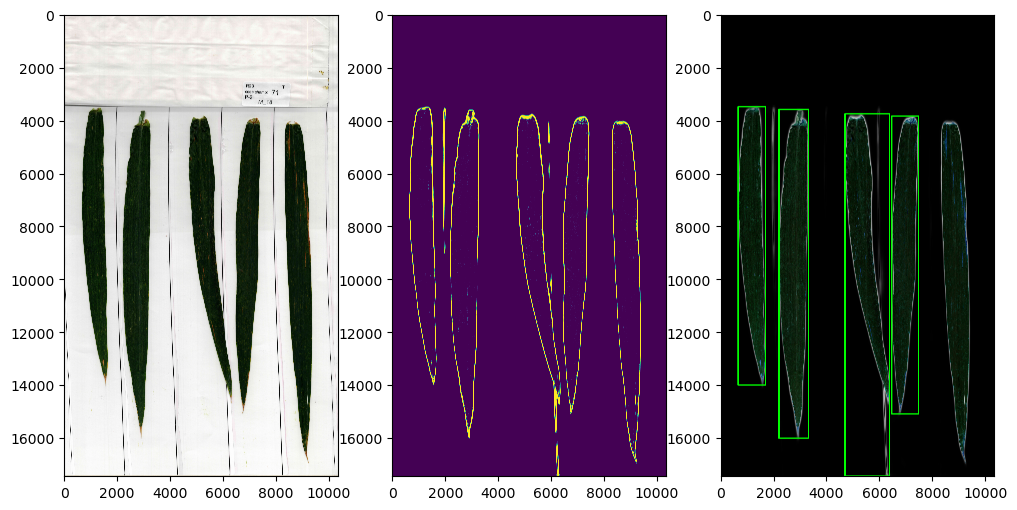

In [40]:
output = np.array(output)
input = np.array(input)


threshold_area = 500000

img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

lower = np.array([50, 50, 50])  # Lower bounds for BGR channels
higher = np.array([250, 250, 250])

mask = cv2.inRange(img, lower, higher)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for c in contours:
    area = cv2.contourArea(c)
    if area > threshold_area:  # Adjust threshold_area to your desired value
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 50)

plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1), plt.imshow(input)
plt.subplot(1, 3, 2), plt.imshow(mask)
plt.subplot(1, 3, 3), plt.imshow(img)
plt.show()

#cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)